In [1]:
import numpy as np
import tensorflow as tf
import sys
sys.path.append('..')
from networks.siamese.omniglot import Omniglot
from datasets.loader import Loader
import matplotlib.pyplot as plt

In [37]:
tf.reset_default_graph()
nn = Omniglot(shape=(105,105),cost_mode="binary_cross_entropy")
nn.forward_prop()
nn.compute_cost(mode="l2_on")
nn.optimize(optimizer="Momentum")
nn.accuracy()

In [13]:
tf.reset_default_graph()
nn2 = Omniglot(shape=(105,105),cost_mode="contrastive_loss")
nn2.forward_prop()
# nn2.compute_cost(mode="l2_on",margin = 1.)
# nn2.optimize(optimizer="Momentum")
# nn2.accuracy()

In [11]:
nn.Y

<tf.Tensor 'Y:0' shape=(1, ?) dtype=float32>

In [54]:
5.471566424e-3

0.005471566424

In [52]:
tf.reset_default_graph()
l = tf.Variable([[1.,2.,3.],[4.,5.,6.]])
a =  tf.divide(l,tf.norm(l,axis=0,keepdims=True))
b =  tf.nn.l2_normalize(l,axis=0)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     tf.initialize_all_variables()
    a,b = sess.run([a,b])
print(a,b)

[[0.24253564 0.37139067 0.4472136 ]
 [0.97014254 0.9284767  0.8944272 ]] [[0.24253564 0.37139067 0.4472136 ]
 [0.97014254 0.9284767  0.8944272 ]]


In [9]:
nn.logits, nn2.logits

(<tf.Tensor 'Add_10:0' shape=(1, ?) dtype=float32>,
 <tf.Tensor 'norm/Sqrt:0' shape=(1, ?) dtype=float32>)

In [13]:
nn.probabilities, nn2.probabilities

(<tf.Tensor 'Sigmoid_2:0' shape=(1, ?) dtype=float32>,
 <tf.Tensor 'norm/Sqrt:0' shape=(1, ?) dtype=float32>)

In [14]:
nn.predicted_labels, nn2.predicted_labels

(<tf.Tensor 'Greater:0' shape=(1, ?) dtype=bool>,
 <tf.Tensor 'Greater:0' shape=(1, ?) dtype=bool>)

# Compute Contrastive loss:
-  euclidean distance between the outputs of two neural networks as Dw
-  compute the exact loss function where Dw is the euclidean distance of the last layer

In [63]:
# Dw = tf.placeholder(dtype= tf.float32, shape=(1,None)) # arbitrarily assign a value but normally compute Euc-norm
# Dw = tf.norm(nn.diff,axis=0,keepdims= True)
tf.reset_default_graph()
diff = tf.placeholder(dtype=tf.float32,shape=(3,None))
Dw = tf.norm(diff,axis=0,keepdims= True)
margin = 1.0
y = tf.placeholder(dtype = tf.float32, shape=(1,None))
# cost = (1./y.get_shape().as_list()[1]) *  (tf.matmul((1-y),0.5 * tf.transpose(tf.square((Dw)))) + tf.matmul(y,0.5*tf.transpose(tf.square(tf.maximum(tf.zeros_like(Dw),margin - Dw)))))
# cost = tf.reduce_mean(tf.tensordot((1-y),0.5 * tf.square((Dw)),axes=1)) + tf.reduce_mean(tf.tensordot(y,0.5*tf.square(tf.maximum(tf.zeros_like(Dw),margin - Dw)),axes=1))
cost = tf.reduce_mean(0.5* ((1-y) * tf.square((Dw)) + (y * tf.square(tf.maximum(tf.zeros_like(Dw),margin - Dw)))))

In [47]:
with tf.Session() as sess:
    c = sess.run([cost],feed_dict={
        y: np.array([[1.,0]]),
        diff : np.array([[0.1,0.2],[0.3,0.4],[0.5,0.6]])
    })

In [36]:
type(y.get_shape().as_list()[0])

int

In [48]:
cost

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [49]:
c

[0.18169604]

In [55]:
tf.maximum(0.,np.array([[1,2,3]]))

<tf.Tensor 'Maximum:0' shape=(1, 3) dtype=float32>

In [56]:
tf.maximum(tf.zeros_like(np.array([[1,2,3]])),np.array([[1,2,3]]))

<tf.Tensor 'Maximum_1:0' shape=(1, 3) dtype=int64>

In [61]:
tf.add

<function tensorflow.python.ops.gen_math_ops.add(x, y, name=None)>

In [64]:
Dw2 = tf.sqrt(tf.reduce_sum(tf.square(diff),axis=0))
with tf.Session() as sess:
    d1,d2 = sess.run([Dw,Dw2],feed_dict={
        diff : np.array([[0.1,0.2],[0.3,0.4],[0.5,0.6]])
    })
print(d1,d2)

[[0.591608   0.74833155]] [0.591608   0.74833155]


In [2]:
orl = Loader(mode="orl_split",n_examples=10,path='/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject')

(180, 105, 105)
(120, 105, 105)
(100, 105, 105)


In [3]:
orl.X.shape

(30, 6, 105, 105, 1)

In [4]:
orl.X_validation.shape

(30, 4, 105, 105, 1)

In [5]:
orl.one_shot_set.shape

(10, 10, 105, 105, 1)

In [6]:
a,b,c = orl.generateOneShotTrials(orl.one_shot_set,5)

In [7]:
a.shape

(5, 105, 105, 1)

In [8]:
b.shape

(5, 105, 105, 1)

In [9]:
c.shape

(1, 5)

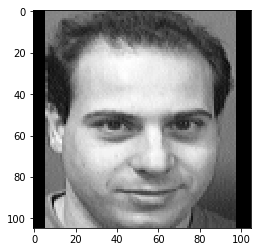

In [10]:
plt.imshow(a[1].reshape(105,105),cmap='gray')
plt.show()

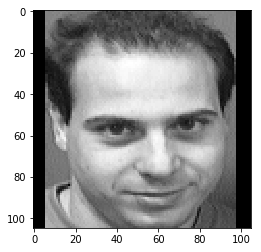

In [11]:
plt.imshow(b[1].reshape(105,105),cmap='gray')
plt.show()

In [8]:
np.ones([2,2])

array([[1., 1.],
       [1., 1.]])

In [27]:

a = tf.placeholder(shape=(1,None),dtype=tf.float32)
b = tf.placeholder(shape=(1,None),dtype=tf.float32)
d = a*b #tf.tensordot(a, b,axes = 1)
with tf.Session() as sess:
    r =  sess.run(d,feed_dict ={
        a:np.array([[1.,3.]]),
        b:np.array([[1.,3.]]),
    })
    
r

array([[1., 9.]], dtype=float32)

In [30]:

tf.sigmoid(nn.logits)

<tf.Tensor 'Sigmoid_3:0' shape=(1, ?) dtype=float32>

In [44]:
tf.reduce_mean(-tf.reduce_sum((nn.Y * tf.log(tf.clip_by_value(tf.sigmoid(nn.logits),1e-10,1.0))) + (1-nn.Y) * tf.log(tf.clip_by_value(1-tf.sigmoid(nn.logits),1e-10,1.0) )) + 2)

<tf.Tensor 'Mean_6:0' shape=() dtype=float32>

In [ ]:
b = tf.log(a)
